In [662]:
import pandas as pd
import json
import os
import requests
from datetime import datetime, timezone
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import statsmodels.api as sms
from tensorflow.keras.layers import Dropout

In [663]:
!pip install pmdarima

In [664]:
url = "https://merolagani.com/handlers/TechnicalChartHandler.ashx?type=get_advanced_chart&symbol=AKJCL&resolution=1D&rangeStartDate=1642411546&rangeEndDate=1770545453&from=&isAdjust=1&currencyCode=NPR"
response = requests.get(url)
data = response.json()


with open("Ankhu.json", "w") as f:
    json.dump(data, f)

In [665]:
companies = ["/content/Ankhu.json"]

for symbol in companies:
    with open(f"{symbol}", 'r') as f:
        data = json.load(f)
        print(data)
    dates = [datetime.fromtimestamp(ts, tz=timezone.utc).strftime('%Y-%m-%d') for ts in data['t']]
    df=pd.DataFrame({
    "Date":dates,
    "Open":data['o'],
    "Close":data['c'],
    "High":data['h'],
    "Low":data['l'],
    "Volume":data['v']

})
    csv_filename = os.path.basename(symbol).replace('.json', '.csv')
    print(csv_filename)
    df.to_csv(csv_filename,index=False)
    print(f"{csv_filename}created")

{'t': [1642452300, 1642538700, 1642625100, 1642711500, 1642970700, 1643057100, 1643143500, 1643229900, 1643316300, 1643575500, 1643661900, 1643748300, 1643921100, 1644180300, 1644266700, 1644353100, 1644439500, 1644525900, 1644785100, 1644871500, 1644957900, 1645044300, 1645130700, 1645389900, 1645476300, 1645562700, 1645649100, 1645735500, 1645994700, 1646081100, 1646253900, 1646599500, 1646685900, 1646858700, 1646945100, 1647204300, 1647290700, 1647377100, 1647463500, 1647809100, 1647895500, 1647981900, 1648068300, 1648154700, 1648413900, 1648500300, 1648586700, 1648673100, 1648759500, 1649018700, 1649105100, 1649191500, 1649277900, 1649364300, 1649709900, 1649796300, 1649882700, 1650228300, 1650314700, 1650401100, 1650487500, 1650573900, 1650833100, 1650919500, 1651005900, 1651092300, 1651178700, 1651524300, 1651697100, 1651783500, 1652042700, 1652129100, 1652215500, 1652301900, 1652388300, 1652820300, 1652906700, 1652993100, 1653079500, 1653338700, 1653425100, 1653511500, 165359790

In [666]:
df = pd.read_csv("Ankhu.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
print(len(df))

942


In [667]:
df.head()

,Open,Close,High,Low,Volume
Date,,,,,
2022-01-17,197.08,194.08,197.08,192.00,162598.0
2022-01-18,194.00,189.64,195.20,187.20,204240.0
2022-01-19,190.80,187.60,192.00,186.00,144065.0
2022-01-20,187.60,192.60,192.80,185.08,139968.0
2022-01-23,195.20,192.00,196.00,190.00,150700.0


In [668]:
df.tail()

,Open,Close,High,Low,Volume
Date,,,,,
2026-02-02,319.9,326.9,338.0,319.9,1252669.0
2026-02-03,320.4,322.0,333.0,320.4,1258177.0
2026-02-04,317.0,354.2,354.2,317.0,2346577.0
2026-02-05,361.2,352.8,372.3,351.0,1125013.0
2026-02-08,357.0,363.0,376.0,351.0,1426865.0


In [669]:
type(df)

pandas.core.frame.DataFrame

In [670]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942 entries, 2022-01-17 to 2026-02-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    942 non-null    float64
 1   Close   942 non-null    float64
 2   High    942 non-null    float64
 3   Low     942 non-null    float64
 4   Volume  942 non-null    float64
dtypes: float64(5)
memory usage: 44.2 KB


<Axes: xlabel='Date'>

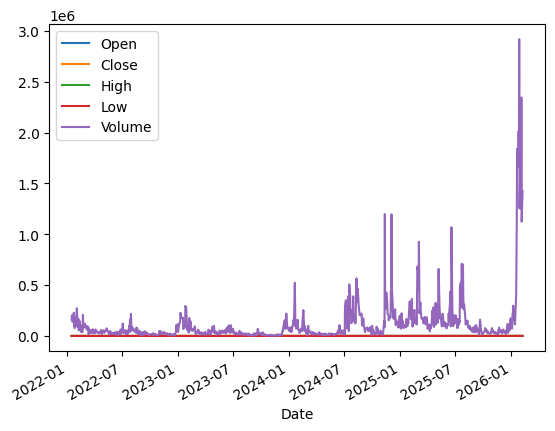

In [671]:
df.plot()

In [672]:
def plot_graph(figsize, df_to_plot, column_name):

    plt.figure(figsize=figsize)
    plt.plot(df_to_plot.index, df_to_plot[column_name], label=column_name)
    plt.title(f"ANKHU {column_name} Over Time")
    plt.xlabel("Date")
    plt.ylabel(column_name)
    plt.legend()
    plt.show()

In [673]:
type(df['Close'])

pandas.core.series.Series

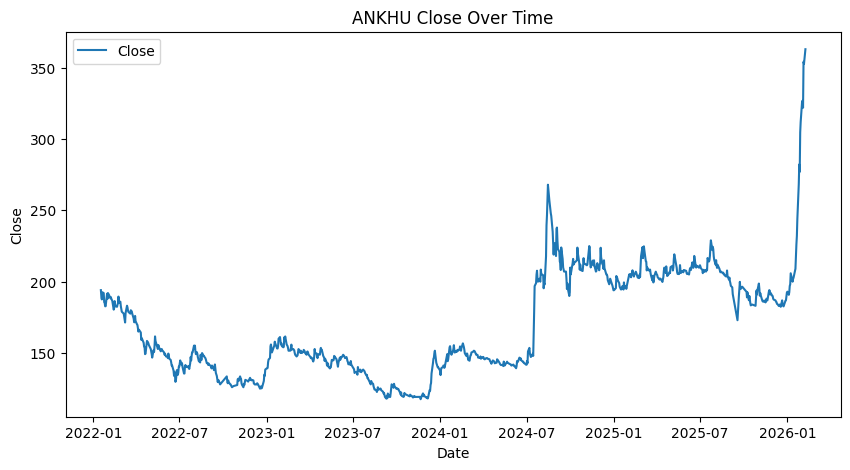

In [674]:
import matplotlib.pyplot as plt
plot_graph((10, 5), df, "Close")

##DICKEY FULLER TEST

In [675]:
from statsmodels.tsa.stattools import adfuller

In [676]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print('The series is stationary.')
    else:
        print('The series is not stationary.')

In [677]:
adf_test(df['Close'])

ADF Statistic: -0.07046519904125477
p-value: 0.9523020056643638
The series is not stationary.


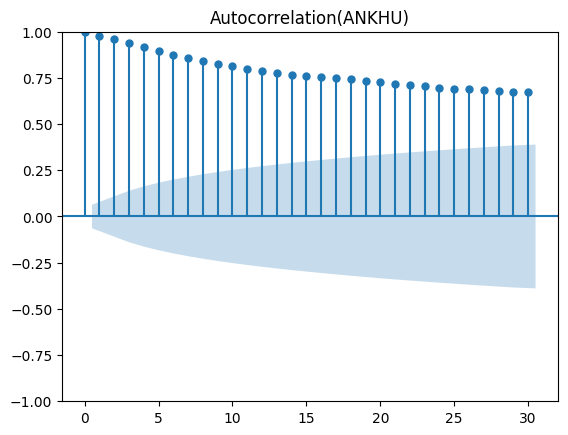

In [678]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(df['Close'])
plt.title("Autocorrelation(ANKHU)")
plt.show()

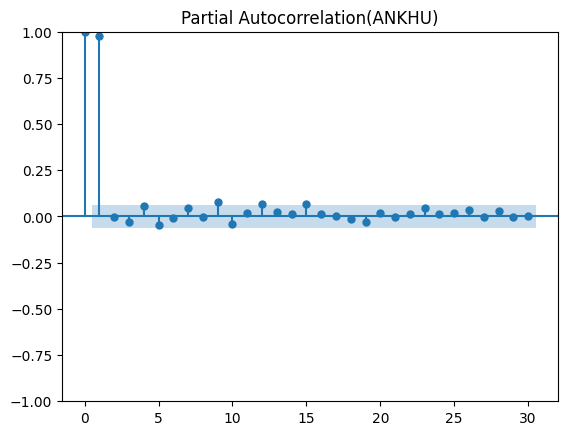

In [679]:
pacf = plot_pacf(df['Close'])
plt.title("Partial Autocorrelation(ANKHU)")
plt.show()

In [680]:
#using differencing
df['Close_first_difference'] = df['Close']-df['Close'].shift(1)

In [681]:
df.head()

,Open,Close,High,Low,Volume,Close_first_difference
Date,,,,,,
2022-01-17,197.08,194.08,197.08,192.00,162598.0,NaN
2022-01-18,194.00,189.64,195.20,187.20,204240.0,-4.44
2022-01-19,190.80,187.60,192.00,186.00,144065.0,-2.04
2022-01-20,187.60,192.60,192.80,185.08,139968.0,5.00
2022-01-23,195.20,192.00,196.00,190.00,150700.0,-0.60


In [682]:
data=df['Close_first_difference'].dropna()
adf_test(data)

ADF Statistic: -2.0793211606635835
p-value: 0.25291054440710203
The series is not stationary.


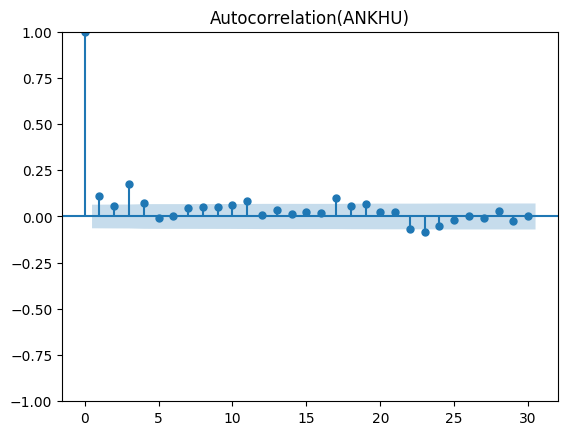

In [683]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(data)
plt.title("Autocorrelation(ANKHU)")
plt.show()

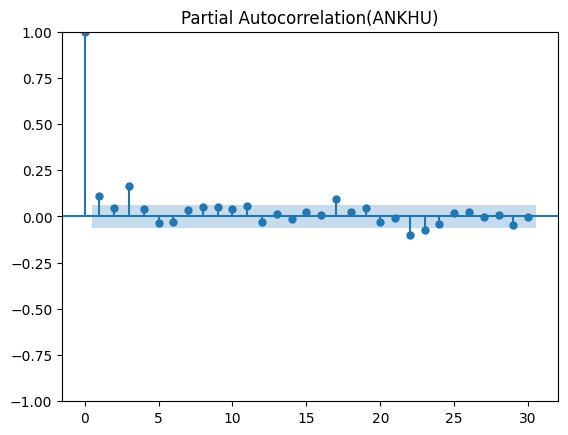

In [684]:
result = plot_pacf(data)
plt.title("Partial Autocorrelation(ANKHU)")
plt.show()

In [685]:
df['Close_second_difference'] = (df['Close_first_difference'] - df['Close_first_difference'].shift(1))
data=df['Close_second_difference'].dropna()
adf_test(data)

ADF Statistic: -8.512730723905895
p-value: 1.1557217794941764e-13
The series is stationary.


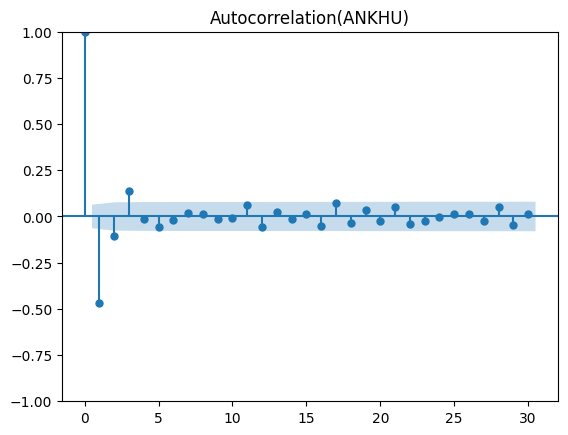

In [686]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(data)
plt.title("Autocorrelation(ANKHU)")
plt.show()

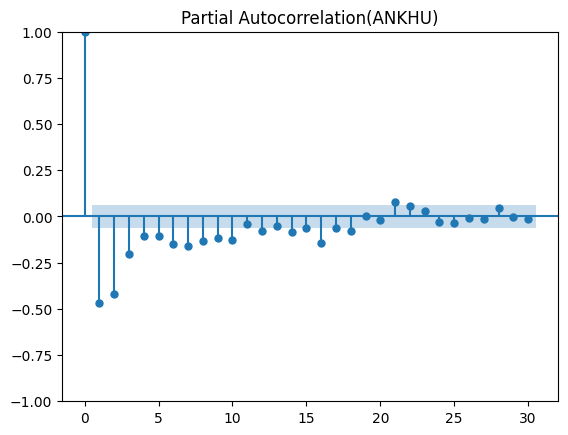

In [687]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pacf = plot_pacf(data)
plt.title("Partial Autocorrelation(ANKHU)")
plt.show()

<Axes: xlabel='Date'>

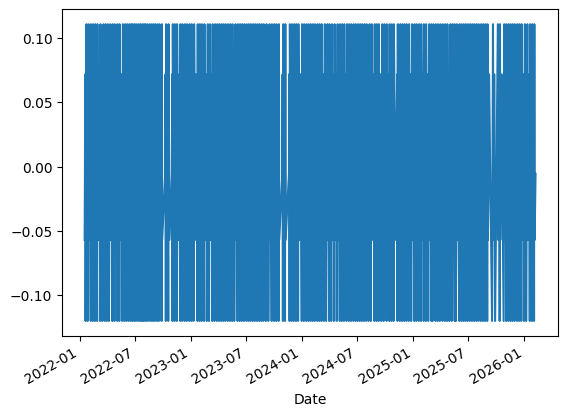

In [688]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result=seasonal_decompose(df['Close'],period=5)
decompose_result.seasonal.plot()

In [689]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
close=df['Close']
res = ARIMA(close, order=(1,2,2)).fit()
acorr_ljungbox(res.resid, lags=[10,15,20], return_df=True)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



,lb_stat,lb_pvalue
10,7.842082,0.644259
15,9.326076,0.859860
20,11.206884,0.940680


In [690]:
to_row=int(len(df)*0.8)
training_data = list(df['Close'].iloc[0:to_row])
testing_data  = list(df['Close'].iloc[to_row:])

In [691]:
testing_data

[202.23,
 201.84,
 201.78,
 199.83,
 203.37,
 207.68,
 209.87,
 206.12,
 210.74,
 207.39,
 204.02,
 204.27,
 205.67,
 206.88,
 206.05,
 210.21,
 211.08,
 207.86,
 209.92,
 215.95,
 219.19,
 213.63,
 209.86,
 206.59,
 205.45,
 205.35,
 205.35,
 206.78,
 211.63,
 207.94,
 206.15,
 207.47,
 207.15,
 206.6,
 208.23,
 207.6,
 205.97,
 205.34,
 205.65,
 205.05,
 207.43,
 209.24,
 209.7,
 208.2,
 213.55,
 211.96,
 209.72,
 211.23,
 218.06,
 211.13,
 209.88,
 211.26,
 210.97,
 210.93,
 209.82,
 210.61,
 211.53,
 210.63,
 209.44,
 208.24,
 205.99,
 207.91,
 208.34,
 206.84,
 208.09,
 207.12,
 208.52,
 208.2,
 216.61,
 214.16,
 215.16,
 218.31,
 224.8,
 229.0,
 222.15,
 224.48,
 222.78,
 217.82,
 215.36,
 211.92,
 215.09,
 211.3,
 209.65,
 211.89,
 209.03,
 207.75,
 206.6,
 207.2,
 206.25,
 206.22,
 206.37,
 205.13,
 205.11,
 203.78,
 204.01,
 203.69,
 207.85,
 204.08,
 201.46,
 202.91,
 200.42,
 199.01,
 197.11,
 196.04,
 191.33,
 173.0,
 190.3,
 199.9,
 195.3,
 195.0,
 196.5,
 192.9,
 189.0,
 

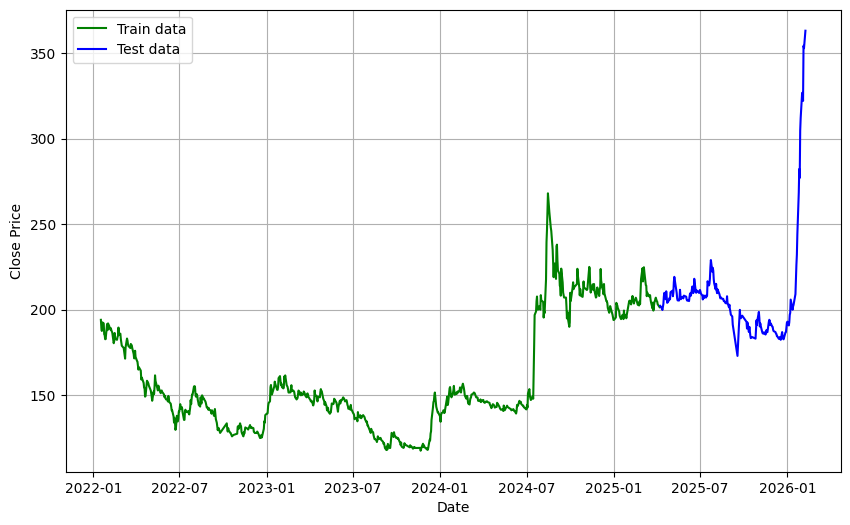

In [692]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df[0:to_row]['Close'],'green',label='Train data')
plt.plot(df[to_row:]['Close'],'blue',label='Test data')
plt.legend()
plt.show()

In [693]:
model_predictions=[]
n_test_obser = len(testing_data)

In [694]:
from statsmodels.tsa.arima.model import ARIMA
model_predictions = []
n_test_obser = len(testing_data)

for i in range(n_test_obser):
    model = ARIMA(training_data, order=(1,2,2))
    model_fit = model.fit()

    output = model_fit.forecast(steps=1)
    yhat = output[0]

    model_predictions.append(yhat)
    training_data.append(testing_data[i])

In [695]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  941
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -2615.767
Date:                Tue, 10 Feb 2026   AIC                           5239.534
Time:                        08:16:42   BIC                           5258.913
Sample:                             0   HQIC                          5246.921
                                - 941                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8681      0.054    -16.067      0.000      -0.974      -0.762
ma.L1         -0.0285      0.049     -0.576      0.564      -0.125       0.068
ma.L2         -0.8602      0.046    -18.819      0.0

In [696]:
print(type(model_predictions))
print(np.array(model_predictions).shape)
print(model_predictions)

<class 'list'>
(189,)
[np.float64(201.42290535705277), np.float64(202.43029574129207), np.float64(201.77427375240472), np.float64(201.8739861520948), np.float64(199.59400601380398), np.float64(204.01784990098986), np.float64(208.06547868488212), np.float64(210.1048783240773), np.float64(205.61276328091736), np.float64(211.67956222757005), np.float64(206.65741219026043), np.float64(203.9912365940378), np.float64(204.3950222346994), np.float64(205.88328794704316), np.float64(207.03590795359707), np.float64(205.96165079955992), np.float64(210.8950667608971), np.float64(211.0040534081042), np.float64(207.57452995252663), np.float64(210.41836475405225), np.float64(216.64973221430424), np.float64(219.45937106915682), np.float64(212.9102167246766), np.float64(209.78870651652335), np.float64(206.26994570409096), np.float64(205.51473311694195), np.float64(205.34686569419216), np.float64(205.4096048591035), np.float64(207.02559884365687), np.float64(212.27690621623384), np.float64(207.2537736600

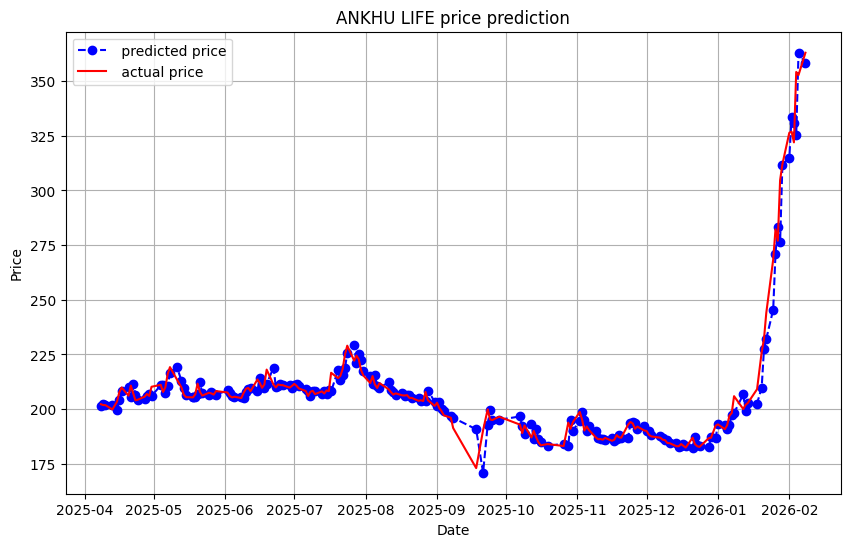

In [697]:
plt.figure(figsize=(10,6))
plt.grid(True)

date_range = df[to_row:].index
plt.plot(date_range, model_predictions, color='blue',marker='o',linestyle='dashed',label=' predicted price')
plt.plot(date_range, testing_data,color='red',label=' actual price')

plt.title('ANKHU LIFE price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [698]:

mape= np.mean(np.abs(np.array(model_predictions)-np.array(testing_data))/np.array(testing_data))
print('Mape:'+str(mape))

Mape:0.014307608183063964


In [699]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(testing_data, model_predictions))
print("RMSE from arima for ANKHU:", rmse)
mae = mean_absolute_error(testing_data,model_predictions)
print("MAE from arima for ANKHU:", mae)

RMSE from arima for ANKHU: 5.344649636084112
MAE from arima for ANKHU: 3.1598706416212483


In [700]:
# Import libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go


final_model = ARIMA(df['Close'], order=(1,2,2))
final_model_fit = final_model.fit()

# --- Forecast next 5 days with confidence intervals ---
forecast = final_model_fit.get_forecast(steps=1)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()



# --- Create future dates starting after last date in df ---
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=5, freq='D')

# --- Interactive plot with plotly ---
fig = go.Figure()

# Historical data
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Close'],
    mode='lines',
    name='Historical'
))

# Forecast
fig.add_trace(go.Scatter(
    x=future_dates,
    y=mean_forecast.values,
    mode='lines+markers',
    name='Forecast',
    line=dict(color='red', dash='dash')
))

# Confidence interval
fig.add_trace(go.Scatter(
    x=list(future_dates) + list(future_dates[::-1]),
    y=list(conf_int.iloc[:,0]) + list(conf_int.iloc[:,1][::-1]),
    fill='toself',
    fillcolor='rgba(255,182,193,0.3)',  # light pink
    line=dict(color='rgba(255,182,193,0)'),
    hoverinfo="skip",
    showlegend=True,
    name='95% CI'
))

fig.update_layout(
    title='Stock Price Forecast with 95% Confidence Interval',
    xaxis_title='Date',
    yaxis_title='Close Price',
    template='plotly_white'
)

fig.show()

# --- Print next day prediction safely ---
print("Next trading day prediction:", float(mean_forecast.iloc[0]))


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the 

Next trading day prediction: 370.4468125504054


In [701]:
print(forecast)

In [702]:
# import pandas as pd
# import pmdarima as pm
# from statsmodels.tsa.arima.model import ARIMA
# import matplotlib.pyplot as plt

# # Suppose df['Close'] has your stock prices
# # Example: df = pd.read_csv("NTC.csv", parse_dates=['Date'], index_col='Date')

# # --- Step 1: Use auto_arima to find best p,d,q ---
# auto_model = pm.auto_arima(
#     df['Close'],
#     start_p=0, max_p=30,
#     start_q=0, max_q=30,
#     d=None,               # if None, automatically test for differencing
#     seasonal=False,       # change to True if you suspect seasonality
#     stepwise=True,        # faster search
#     suppress_warnings=True,
#     trace=True            # prints search progress
# )

# print("Best ARIMA order:", auto_model.order)

In [703]:
import pickle
with open("arima_model_feb_ANKHU.pkl", "wb") as f:
    pickle.dump(final_model_fit, f)

print("Model saved as arima_model.pkl")

Model saved as arima_model.pkl
